In [2]:
using StatsPlots
using Plots
using DataFrames
using CSV
using Statistics

abs_project_path = normpath(joinpath(@__FILE__,"..", "..", ".."))
include(joinpath(abs_project_path, "utilities", "multiple_plots.jl"))

grouped_boxplot (generic function with 1 method)

In [3]:
methods_to_evaluate = ["Rand_MS", "DS", "MDS"]
fdr_columns = ["FDR_" * method for method in methods_to_evaluate];
tpr_columns = ["TPR_" * method for method in methods_to_evaluate];

## FDR and TPR for Rho fixed to 0.5 (baseline correlation coefficient of the features covariance matrix)

In [13]:
df = CSV.read(joinpath(abs_project_path, "experiments", "results", "simulation_n_800_p_2000_rho_5_time_20231023.csv"), DataFrames.DataFrame)
df = df[df.successsfull_run .== 1., :];

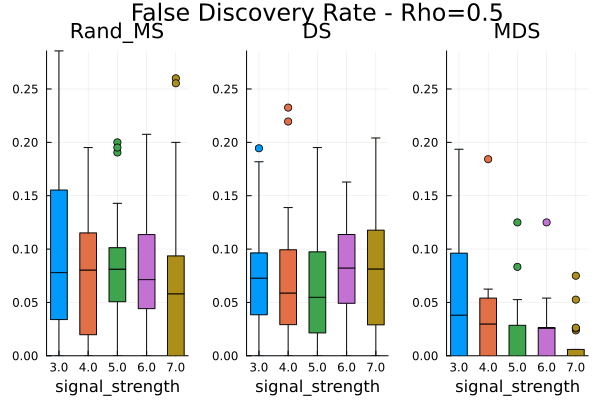

In [14]:
grouped_boxplot(df=df, group_var=:signal_strength, var_columns=fdr_columns,
    title_plot="False Discovery Rate - Rho=0.5", sub_titles=methods_to_evaluate
)

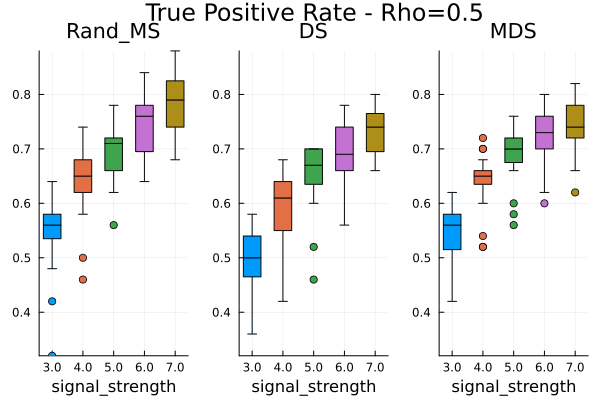

In [15]:
grouped_boxplot(df=df, group_var=:signal_strength, var_columns=tpr_columns,
    title_plot="True Positive Rate - Rho=0.5", sub_titles=methods_to_evaluate
)

## FDR and TPR for beta signal strength fixed to 5

In [16]:
df = CSV.read(joinpath(abs_project_path, "experiments", "results", "simulation_n_800_p_2000_beta_5_time_20231023.csv"), DataFrames.DataFrame)
df = df[df.successsfull_run .== 1., :];

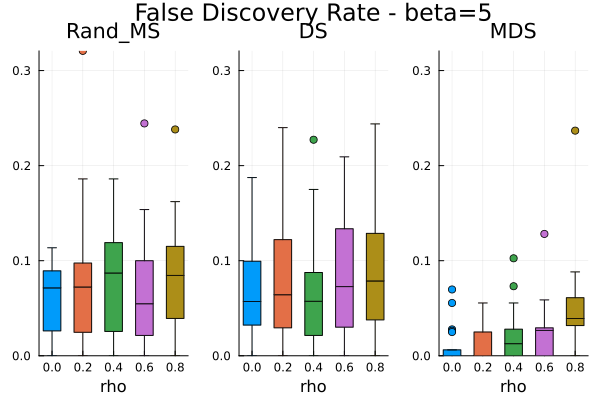

In [17]:
grouped_boxplot(df=df, group_var=:rho, var_columns=fdr_columns,
    title_plot="False Discovery Rate - beta=5", sub_titles=methods_to_evaluate
)

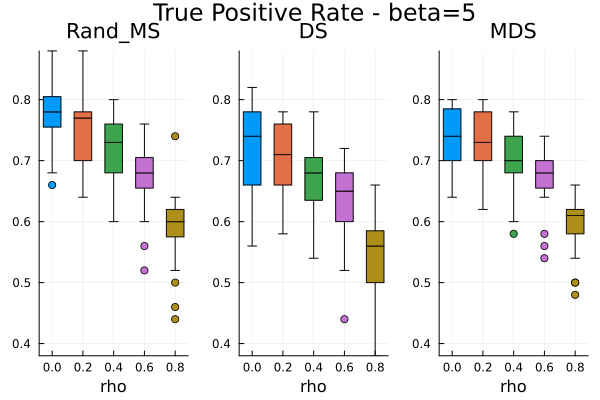

In [18]:
grouped_boxplot(df=df, group_var=:rho, var_columns=tpr_columns,
    title_plot="True Positive Rate - beta=5", sub_titles=methods_to_evaluate
)

## FDR and TPR for beta coefficients samples from fixed pool

In [19]:
df = CSV.read(joinpath(abs_project_path, "experiments", "results", "simulation_n_800_p_2000_beta_pool_time_20231024.csv"), DataFrames.DataFrame)
df = df[df.successsfull_run .== 1., :];

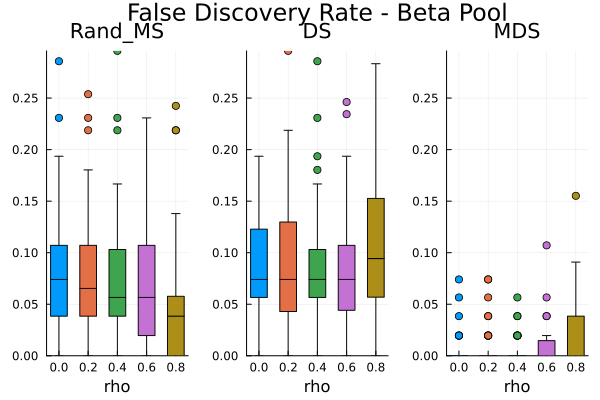

In [20]:
grouped_boxplot(df=df, group_var=:rho, var_columns=fdr_columns,
    title_plot="False Discovery Rate - Beta Pool", sub_titles=methods_to_evaluate
)

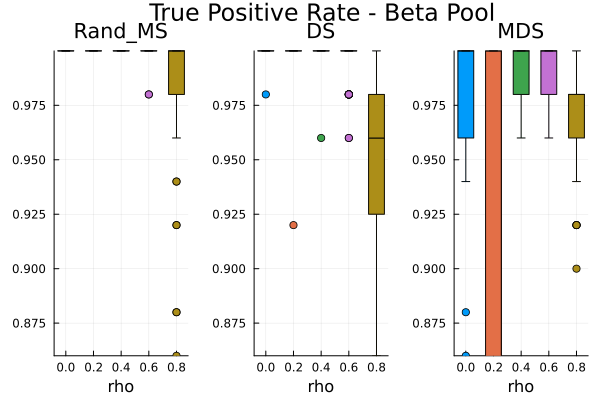

In [21]:
grouped_boxplot(df=df, group_var=:rho, var_columns=tpr_columns,
    title_plot="True Positive Rate - Beta Pool", sub_titles=methods_to_evaluate
)

### Using ElasticNet (alpha=.5)

In [23]:
df = CSV.read(joinpath(abs_project_path, "experiments", "results", "simulation_n_800_p_2000_beta_pool_ElasticNet_time_20231026.csv"), DataFrames.DataFrame)
df = df[df.successsfull_run .== 1., :];

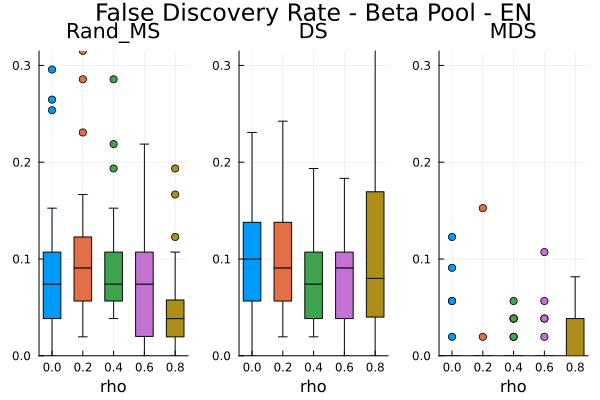

In [24]:
grouped_boxplot(df=df, group_var=:rho, var_columns=fdr_columns,
    title_plot="False Discovery Rate - Beta Pool - EN", sub_titles=methods_to_evaluate
)

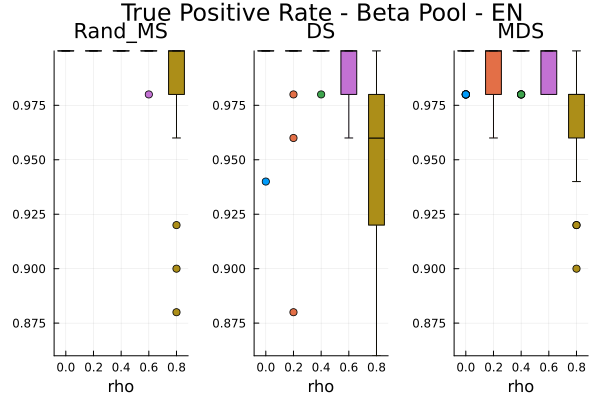

In [25]:
grouped_boxplot(df=df, group_var=:rho, var_columns=tpr_columns,
    title_plot="True Positive Rate - Beta Pool - EN", sub_titles=methods_to_evaluate
)

## ElasticNet with Random coeffiecients

In [4]:
df = CSV.read(joinpath(abs_project_path, "experiments", "results", "simulation_n_800_p_2000_beta_random_ElasticNet_time_20231026.csv"), DataFrames.DataFrame)
df = df[df.successsfull_run .== 1., :];

In [6]:
df[1:5, :]

5×9 DataFrame
 Row │ FDR_Rand_MS  FDR_DS    FDR_MDS    TPR_Rand_MS  TPR_DS   TPR_MDS  succes ⋯
     │ Float64      Float64   Float64    Float64      Float64  Float64  Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   0.27907    0.037037  0.0294118         0.62     0.52     0.66         ⋯
   2 │   0.0        0.2       0.0588235         0.66     0.64     0.64
   3 │   0.0555556  0.219512  0.0               0.68     0.64     0.64
   4 │   0.0322581  0.09375   0.0               0.6      0.58     0.62
   5 │   0.0294118  0.03125   0.027027          0.66     0.62     0.72         ⋯
                                                               3 columns omitted

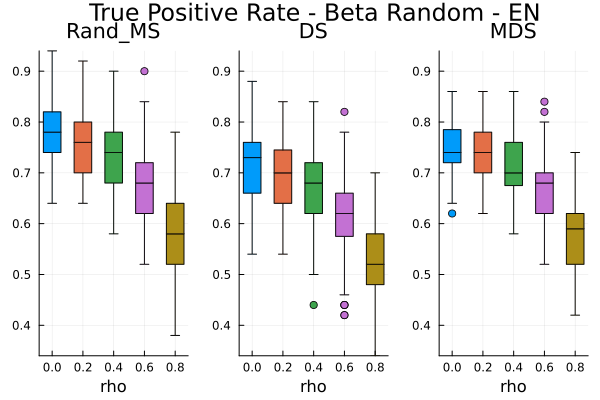

In [10]:
grouped_boxplot(df=df[df[!, "signal_strength"] .== 5., :],
    group_var=:rho, var_columns=tpr_columns,
    title_plot="True Positive Rate - Beta Random - EN",
    sub_titles=methods_to_evaluate
)

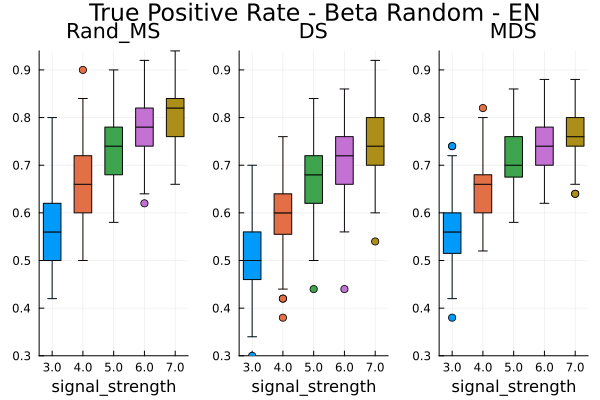

In [11]:
grouped_boxplot(df=df[df[!, "rho"] .== 0.4, :],
    group_var=:signal_strength, var_columns=tpr_columns,
    title_plot="True Positive Rate - Beta Random - EN",
    sub_titles=methods_to_evaluate
)

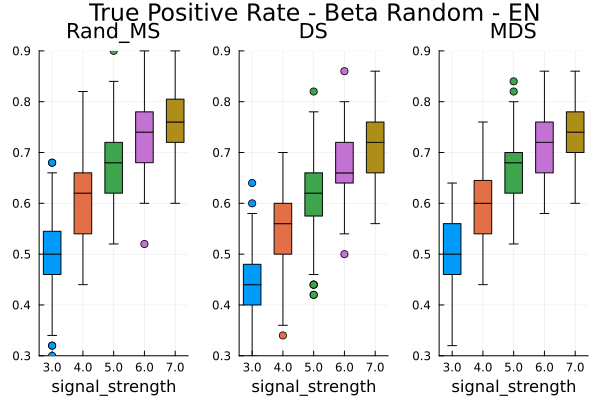

In [12]:
grouped_boxplot(df=df[df[!, "rho"] .== 0.6, :],
    group_var=:signal_strength, var_columns=tpr_columns,
    title_plot="True Positive Rate - Beta Random - EN",
    sub_titles=methods_to_evaluate
)

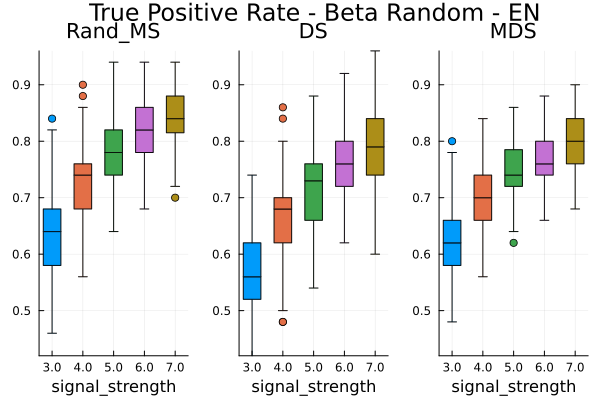

In [13]:
grouped_boxplot(df=df[df[!, "rho"] .== 0., :],
    group_var=:signal_strength, var_columns=tpr_columns,
    title_plot="True Positive Rate - Beta Random - EN",
    sub_titles=methods_to_evaluate
)